# Assignment 3

## Task 1

In [9]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Load data

In [27]:
# Load Data
data = pd.read_csv('./task1data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data info

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Data cleaning

In [29]:
# Data cleaning, check if data has NaN value
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Data is already pretty clean

### Feature selection

In [30]:
from sklearn.feature_selection import SelectKBest,chi2

In [31]:
# Explore feature importance
X = data.drop(columns=['id','diagnosis','Unnamed: 32']) # independent variable
y = data[['diagnosis']] # dependent variable

In [32]:
X.shape, y.shape

((569, 30), (569, 1))

Before feature selection, we need to first turn categorical value into numerical value for dataframe `y`, use 1 to denote 'M', 0 to denote 'B'

In [33]:
y = y.replace(['M','B'],[1,0])
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [34]:
# Use selectKbest and chi2 to get all feature score
selector = SelectKBest(chi2,k=30).fit(X, y)
X_new = selector.transform(X)


In [35]:
# feature scores
df_feature = []
for i in range (30):
    df_feature.append([selector.feature_names_in_[i], selector.scores_[i]])
df_feature = pd.DataFrame(data=df_feature,
                          columns=['feature_name','score'])
df_feature = df_feature.sort_values(by=['score'], ascending=False).reset_index(drop=True)
df_feature

,feature_name,score
0,area_worst,112598.431564
1,area_mean,53991.655924
2,area_se,8758.504705
3,perimeter_worst,3665.035416
4,perimeter_mean,2011.102864
5,radius_worst,491.689157
6,radius_mean,266.104917
7,perimeter_se,250.571896
8,texture_worst,174.449400
9,texture_mean,93.897508


#### Fits model on 3 differernt feature sets

In [36]:
# Pick 3 sets of features, from top to bottom
df_feature_a = df_feature[:10]
df_feature_a

,feature_name,score
0,area_worst,112598.431564
1,area_mean,53991.655924
2,area_se,8758.504705
3,perimeter_worst,3665.035416
4,perimeter_mean,2011.102864
5,radius_worst,491.689157
6,radius_mean,266.104917
7,perimeter_se,250.571896
8,texture_worst,174.449400
9,texture_mean,93.897508


<AxesSubplot: xlabel='feature_name', ylabel='score'>

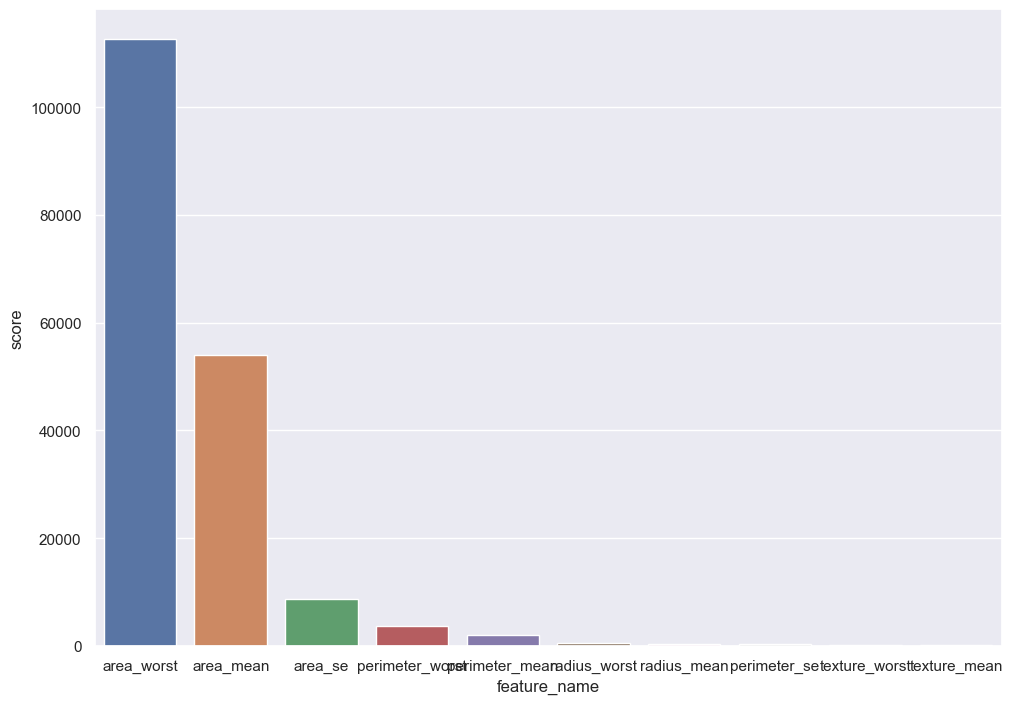

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_feature_a, x="feature_name", y="score")

In [38]:
df_feature_b = df_feature[10:20]
df_feature_b

,feature_name,score
10,concavity_worst,39.516915
11,radius_se,34.675247
12,concavity_mean,19.712354
13,compactness_worst,19.314922
14,concave points_worst,13.485419
15,concave points_mean,10.544035
16,compactness_mean,5.403075
17,symmetry_worst,1.298861
18,concavity_se,1.044718
19,compactness_se,0.613785


<AxesSubplot: xlabel='feature_name', ylabel='score'>

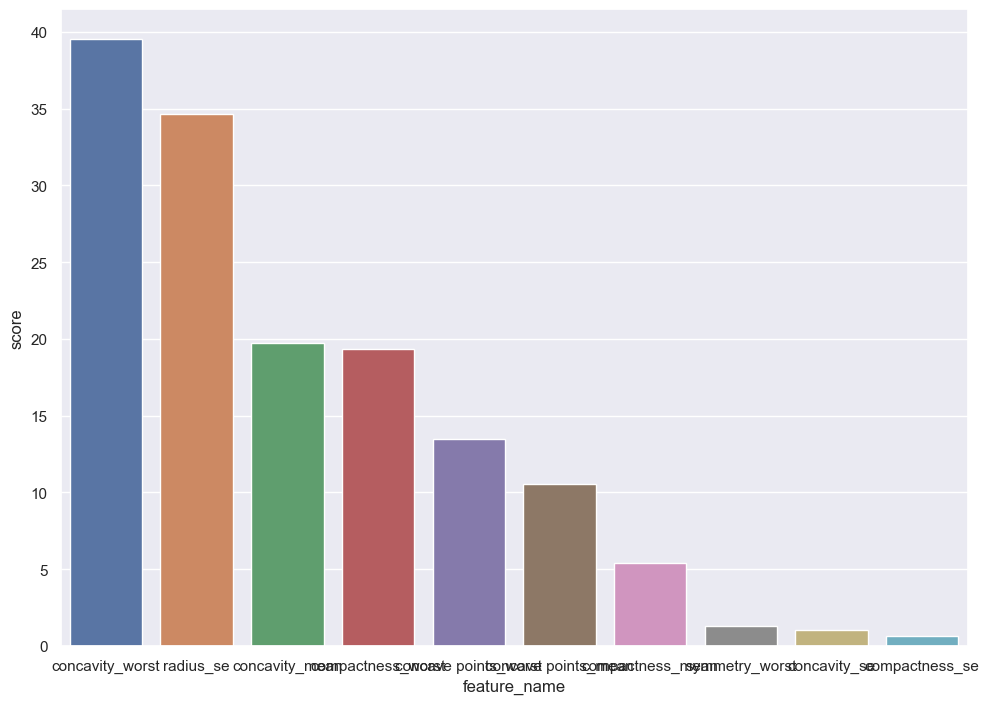

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_feature_b, x="feature_name", y="score")

In [46]:
df_feature_c = df_feature[20:31]
df_feature_c

,feature_name,score
20,smoothness_worst,0.397366
21,concave points_se,0.305232
22,symmetry_mean,0.257380
23,fractal_dimension_worst,0.231522
24,smoothness_mean,0.149899
25,texture_se,0.009794
26,fractal_dimension_se,0.006371
27,smoothness_se,0.003266
28,symmetry_se,0.000080
29,fractal_dimension_mean,0.000074


<AxesSubplot: xlabel='feature_name', ylabel='score'>

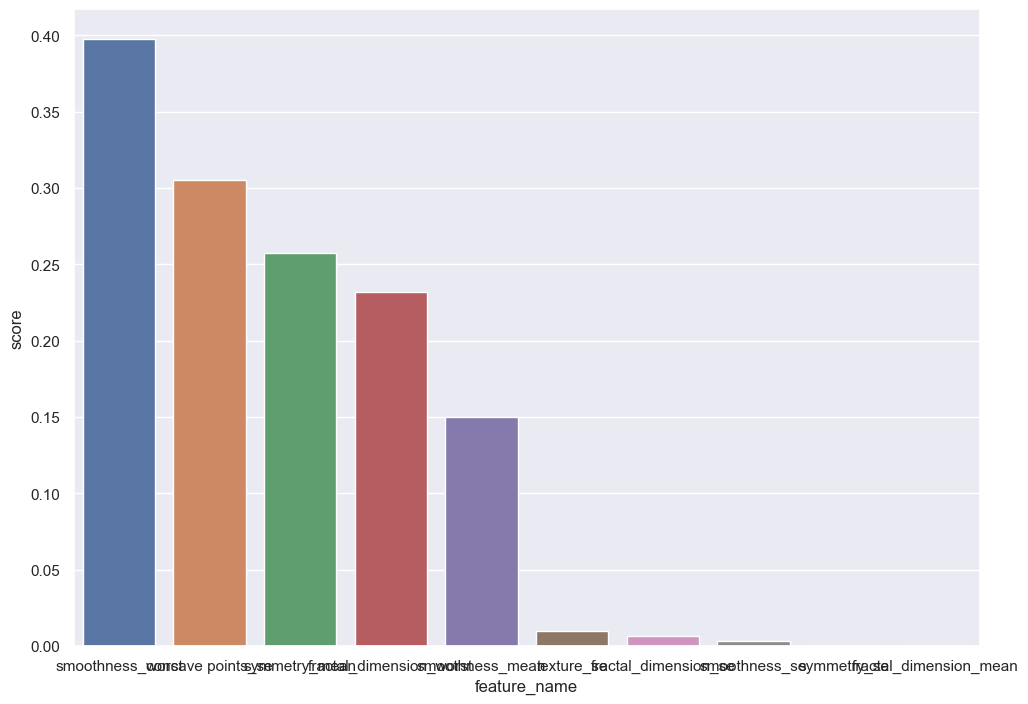

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_feature_c, x="feature_name", y="score")

### Tran/test/validation Split

Use the features in `df_feature_a`, which is the top 10 most important features

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
feature_list_a = list(df_feature_a['feature_name'])
X_a = X[feature_list_a] 

In [75]:
X_a.shape

(569, 10)

In [76]:
y.shape

(569, 1)

In [77]:
# Split data in 7:3 ratio into train, test sets
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y, test_size=0.3, random_state=42)

In [78]:
print("Shape of test set:", X_test_a.shape)
print("Shape of training set:", X_train_a.shape)

Shape of test set: (171, 10)
Shape of training set: (398, 10)


In [79]:
X_train_a.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
149,725.9,585.0,21.47,97.19,88.12,15.34,13.74,1.573,22.46,17.91
124,632.1,553.5,14.66,91.99,86.10,14.26,13.37,1.223,22.75,16.39
421,809.2,656.1,49.45,114.10,98.22,16.46,14.69,4.795,18.34,13.98
195,600.6,516.4,15.75,90.81,82.53,13.88,12.91,1.493,22.00,16.33
545,729.8,573.2,31.24,97.58,87.19,15.35,13.62,2.066,29.09,23.23


In [80]:
y_train_a.head()

,diagnosis
149,0
124,0
421,0
195,0
545,0


Further divide the test set 50:50

In [81]:
import math

In [82]:
X_test_a_new = X_test_a.iloc[:math.floor(len(X_test_a)/2)]
y_test_a_new = y_test_a.iloc[:math.floor(len(y_test_a)/2)]
X_vali_a_new = X_test_a.iloc[math.floor(len(X_test_a)/2):]
y_vali_a_new = y_test_a.iloc[math.floor(len(y_test_a)/2):]

In [83]:
X_test_a_new.shape, y_test_a_new.shape

((85, 10), (85, 1))

In [84]:
X_vali_a_new.shape, y_vali_a_new.shape

((86, 10), (86, 1))

In [85]:
X_test_a_new.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
204,677.9,481.9,30.29,96.05,81.09,14.97,12.47,2.497,24.64,18.60
70,1866.0,1130.0,96.05,165.90,123.60,24.86,18.94,5.486,26.58,21.31
131,1156.0,748.9,48.31,124.90,101.70,19.26,15.46,3.094,26.00,19.48
431,515.8,467.8,15.43,89.61,81.47,12.88,12.40,2.204,22.91,17.68
540,457.8,402.9,20.86,78.78,74.65,12.26,11.54,1.628,19.68,14.44


In [86]:
X_vali_a_new.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
257,928.8,713.3,59.460,119.80,103.20,17.73,15.32,4.061,22.66,17.27
9,711.4,475.9,23.940,97.65,83.97,15.09,12.46,2.039,40.68,24.04
468,1437.0,980.5,104.900,143.60,119.00,21.57,17.60,5.801,28.87,23.33
382,488.4,447.8,9.549,87.36,78.75,12.57,12.05,1.778,28.71,22.72
322,599.5,504.8,16.570,92.80,82.82,14.04,12.86,1.614,21.08,13.32


### Build logistic regression model

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lrm = LogisticRegression().fit(X_train_a, y_train_a)
# lrm.score(X_vali_a_new, y_vali_a_new)
lrm.score(X_test_a_new, y_test_a_new)

/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9647058823529412

### Evaluating on Validation Set
Evaluation metrics: ROC AUC

In [89]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [90]:
y_pred_a = lrm.predict(X_vali_a_new)
y_pred_a.shape

(86,)

In [91]:
f1_score(y_vali_a_new, y_pred_a)


0.9538461538461539

In [92]:
print(classification_report(y_vali_a_new, y_pred_a))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.94      0.97      0.95        32

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



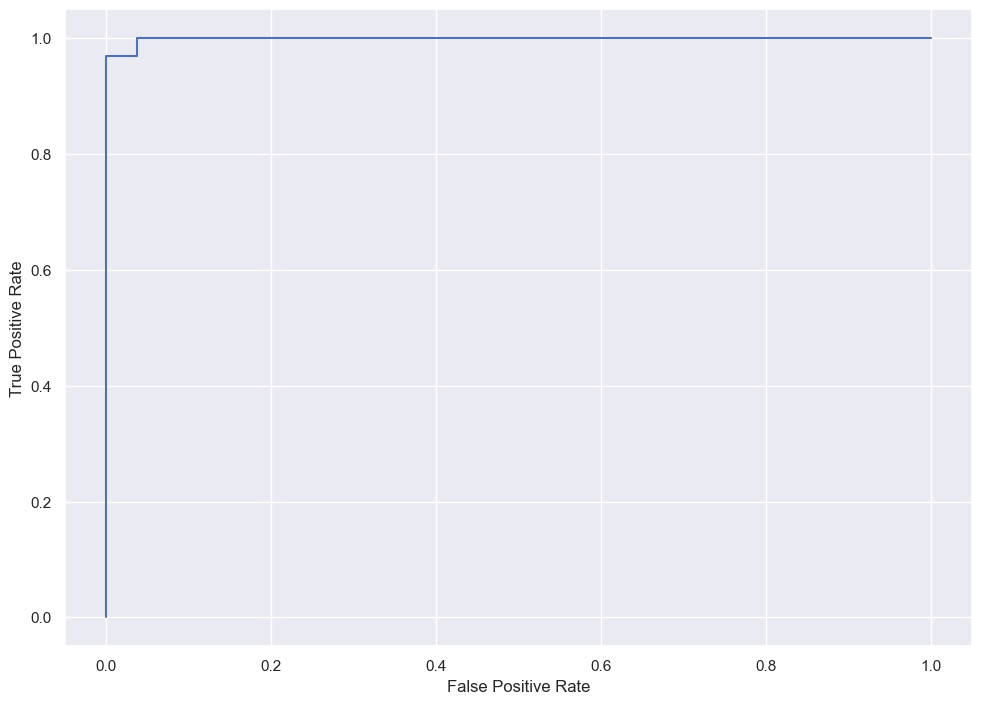

In [93]:
y_score_a = lrm.decision_function(X_vali_a_new)
fpr, tpr, _ = roc_curve(y_vali_a_new, y_score_a)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [94]:
roc_auc_score(y_vali_a_new, y_score_a)

0.9988425925925927

### Use feature set B

In [95]:
# use other features
feature_list_b = list(df_feature_b['feature_name'])
X_b = X[feature_list_b]

In [96]:
X_b.shape

(569, 10)

In [97]:
# Split data in 7:3 ratio into train, test sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y, test_size=0.3, random_state=42)

In [98]:
X_test_b_new = X_test_b.iloc[:math.floor(len(X_test_b)/2)]
y_test_b_new = y_test_b.iloc[:math.floor(len(y_test_b)/2)]
X_vali_b_new = X_test_b.iloc[math.floor(len(X_test_b)/2):]
y_vali_b_new = y_test_b.iloc[math.floor(len(y_test_b)/2):]

In [99]:
X_test_b_new.shape, y_test_b_new.shape

((85, 10), (85, 1))

In [100]:
X_vali_b_new.shape, y_vali_b_new.shape

((86, 10), (86, 1))

In [101]:
lrm = LogisticRegression().fit(X_train_b, y_train_b)
lrm.score(X_vali_b_new, y_vali_b_new)

/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9069767441860465

In [102]:
y_pred_b = lrm.predict(X_vali_b_new)
y_pred_b.shape

(86,)

In [103]:
f1_score(y_vali_b_new, y_pred_b)

0.875

In [104]:
print(classification_report(y_vali_b_new, y_pred_b))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.88      0.88      0.88        32

    accuracy                           0.91        86
   macro avg       0.90      0.90      0.90        86
weighted avg       0.91      0.91      0.91        86



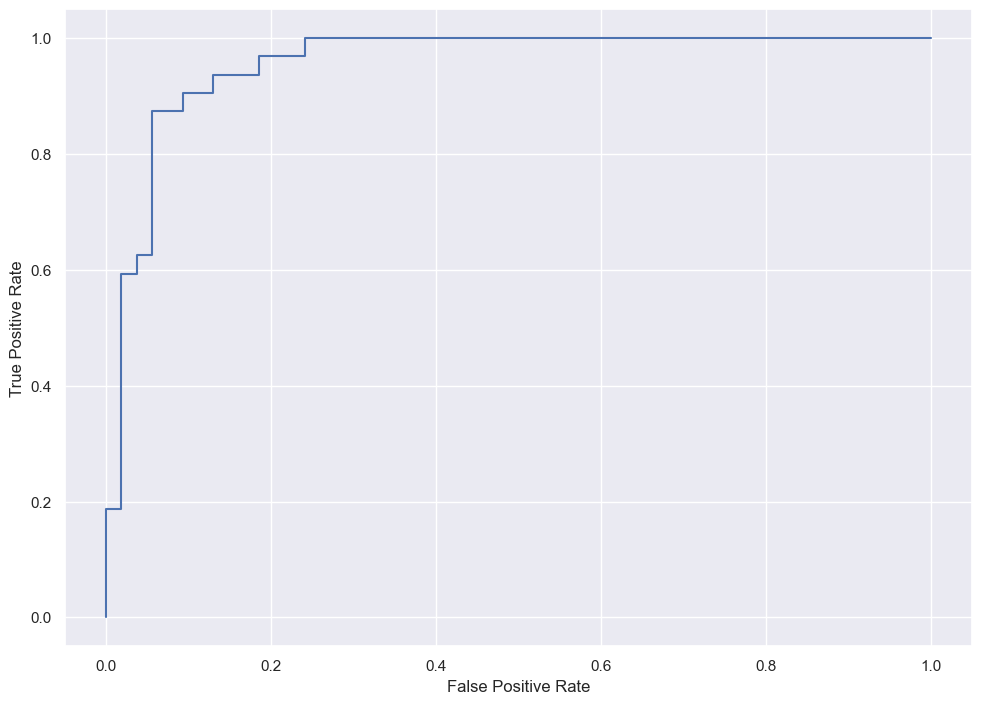

In [105]:
y_score_b = lrm.decision_function(X_vali_b_new)
fpr, tpr, _ = roc_curve(y_vali_b_new, y_score_b)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [106]:
roc_auc_score(y_vali_b_new, y_score_b)

0.9571759259259259

### Use feature set C

In [107]:
# use other features
feature_list_c = list(df_feature_c['feature_name'])
X_c = X[feature_list_c]

In [108]:
X_c.shape

(569, 10)

In [109]:
# Split data in 7:3 ratio into train, test sets
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y, test_size=0.3, random_state=42)

In [110]:
X_test_c_new = X_test_c.iloc[:math.floor(len(X_test_c)/2)]
y_test_c_new = y_test_c.iloc[:math.floor(len(y_test_c)/2)]
X_vali_c_new = X_test_c.iloc[math.floor(len(X_test_c)/2):]
y_vali_c_new = y_test_c.iloc[math.floor(len(y_test_c)/2):]

In [111]:
X_test_c_new.shape, y_test_c_new.shape

((85, 10), (85, 1))

In [112]:
X_vali_c_new.shape, y_vali_c_new.shape

((86, 10), (86, 1))

In [113]:
lrm = LogisticRegression().fit(X_train_c, y_train_c)
lrm.score(X_vali_c_new, y_vali_c_new)

/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.627906976744186

In [114]:
y_pred_c = lrm.predict(X_vali_c_new)
y_pred_c.shape

(86,)

In [115]:
f1_score(y_vali_c_new, y_pred_c)

0.0

In [116]:
print(classification_report(y_vali_c_new, y_pred_c))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        54
           1       0.00      0.00      0.00        32

    accuracy                           0.63        86
   macro avg       0.31      0.50      0.39        86
weighted avg       0.39      0.63      0.48        86



/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

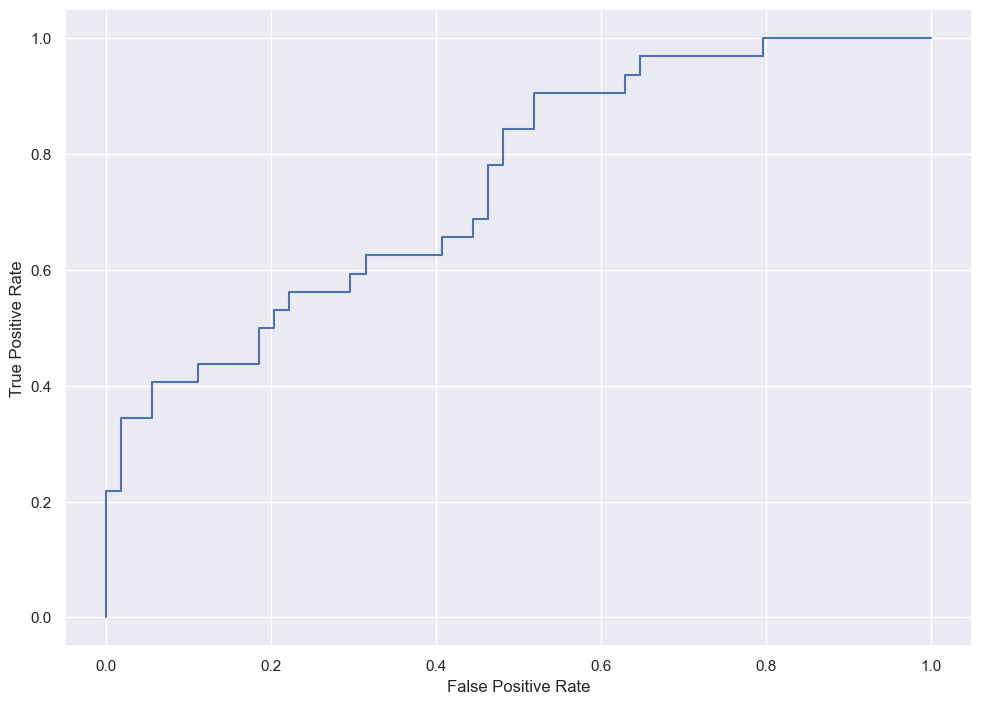

In [117]:
y_score_c = lrm.decision_function(X_vali_c_new)
fpr, tpr, _ = roc_curve(y_vali_c_new, y_score_c)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [118]:
roc_auc_score(y_vali_c_new, y_score_c)

0.7494212962962963

### Conclution
After comparing the logistic regression models trained on **feature set A** (the top 10 best features) and **feature set B** (the second best 10 features), we can see from the roc curve and auc score that the first model outperform the second model by at least 5%, gave a more accurate prediction.